<a href="https://colab.research.google.com/github/hscrown/madatpublicdata/blob/main/%EC%82%AC%EC%9A%A9%EC%9E%90_%ED%8F%89%EC%A0%90%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 34.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


## 데이터로드 및 전처리

도서관데이터

In [4]:
# 필요한 컬럼 # 시설명, 구이름, 장소구분
lib = pd.read_csv('seoul_libs.csv', encoding='utf-8')
lib.head()

# 밸류값이 모두 'lib'인 ['type'] 칼럼 추가
lib['type'] = 'lib'

# 컬럼명 변경
cols= {'도서관 일련번호':'place_id', '도서관명':'place_name', '구명':'gu_name'}
lib = lib.rename(columns=cols)
lib.columns

# # 필요한 컬럼만 추출
lib=lib[['place_name', 'gu_name', 'type']]
lib.head()


,place_name,gu_name,type
0,BIBLIOTECA,강남구,lib
1,LH강남3단지작은도서관,강남구,lib
2,休+밤토리SH작은도서관,강남구,lib
3,강남구립못골도서관,강남구,lib
4,강남데시앙파크작은도서관,강남구,lib


공원데이터

In [5]:
# 필요한 컬럼 # 시설명, 구이름, 장소구분
par = pd.read_csv('seoul_parks.csv', encoding='utf-8')
par.head()
par.columns
# 밸류값이 모두 'par'인 ['type'] 칼럼 추가
par['type'] = 'par'

# 컬럼명 변경
cols= {'공원명':'place_name', '공원주소':'gu_name'}
par = par.rename(columns=cols)
par.columns

# 공원주소 컬럼에서 구 이름만 추출
par['gu_name'] = par['gu_name'].str.split(' ', expand=True)[1]

# 결측치 삭제
par = par.dropna()

# gu_name이 '구'로 끝나지 않으면 삭제
par = par[par['gu_name'].str.endswith('구')]

# # 필요한 컬럼만 추출
par=par[['place_name', 'gu_name', 'type']]
par.head()

,place_name,gu_name,type
0,남산도시자연공원,중구,par
12,여의도근린공원,영등포구,par
16,보라매근린공원,동작구,par
17,어린이대공원,광진구,par
18,천호근린공원,강동구,par


박물관, 미술관 데이터

In [6]:
dataset = load_dataset("hscrown/seoul_museums")
muse = pd.DataFrame(dataset['train'])

muse.columns

# 밸류값이 모두 'muse'인 ['type'] 칼럼 추가
muse['type'] = 'muse'

# 컬럼명 변경
cols= {'시설명':'place_name', '주소':'gu_name'}
muse = muse.rename(columns=cols)

# 주소 컬럼에서 구 이름만 추출
muse['gu_name'] = muse['gu_name'].str.split(' ', expand=True)[1]

# gu_name이 '구'로 끝나지 않으면 삭제
muse = muse[muse['gu_name'].str.endswith('구')]
# # 필요한 컬럼만 추출
muse=muse[['place_name', 'gu_name', 'type']]

muse.tail()

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/175 [00:00<?, ? examples/s]

,place_name,gu_name,type
170,매헌윤봉길의사기념관,서초구,muse
171,동덕여자대학교 박물관,성북구,muse
172,DDP디자인뮤지엄,중구,muse
173,아모레퍼시픽미술관,용산구,muse
174,롯데뮤지엄,송파구,muse


In [7]:
# 공원데이터와 도서관 데이터 합침
df = pd.concat([lib, par,muse])
df.tail()

# 인덱스 초기화
df = df.reset_index(drop=True)

# 'place_id' 컬럼 만들고 인덱스 밸류로 넣기
df['place_id'] = df.index

df.head()

# df 를 csv 파일로 변환
df.to_csv('places.csv', index=False, encoding='utf-8')

In [ ]:
df.tail()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place_name  1663 non-null   object
 1   gu_name     1663 non-null   object
 2   type        1663 non-null   object
 3   place_id    1663 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 52.1+ KB


# 사용자 평점데이터 만들기

In [33]:
import pandas as pd
import numpy as np

def generate_user_ratings(num_users, num_places):
    # 데이터 프레임 초기 설정: 각 사용자마다 리뷰할 장소 수를 무작위로 결정
    data = []
    for user_id in range(num_users):
        num_places_reviewed = np.random.randint(1, num_places + 1)  # 각 사용자가 리뷰할 장소 수를 무작위로 결정
        places_reviewed = np.random.choice(range(num_places), num_places_reviewed, replace=False)
        for place_id in places_reviewed:
            data.append({'user_id': user_id, 'place_id': place_id})

    user_rating = pd.DataFrame(data)

    # 각 사용자별 평균 평점과 평점의 표준 편차를 무작위로 설정하여 개인의 평가 스타일 반영
    mean_ratings = np.random.uniform(2.5, 4.5, size=num_users)
    std_deviations = np.random.uniform(0.5, 2.0, size=num_users)

    # 각 장소의 인기도에 따른 평균 평점 조정치 설정 (더 인기 있는 장소는 높은 평균 평점을 가짐)
    place_popularity = np.random.normal(0, 0.5, size=num_places)  # 인기 있는 장소는 양의 값을, 덜 인기 있는 장소는 음의 값을 가짐

    # 사용자별 평점 생성
    user_rating['rating'] = [np.random.normal(mean_ratings[row['user_id']] + place_popularity[row['place_id']],
                                              std_deviations[row['user_id']])
                             for index, row in user_rating.iterrows()]

    # 평점을 0.5와 5 사이로 조정하고, 가장 가까운 0.5 단위로 반올림
    user_rating['rating'] = np.clip(user_rating['rating'], 0.5, 5)
    user_rating['rating'] = (np.round(user_rating['rating'] * 2) / 2).round(1)

    return user_rating

# 사용자 수와 장소 수 설정
num_users = 1000
num_places = 1663

# 사용자 평점 생성
user_rating = generate_user_ratings(num_users, num_places)
print(user_rating.tail())

        user_id  place_id  rating
813405      999       746     4.0
813406      999       324     3.0
813407      999      1367     1.5
813408      999       500     3.0
813409      999       921     2.0


In [34]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813410 entries, 0 to 813409
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   813410 non-null  int64  
 1   place_id  813410 non-null  int64  
 2   rating    813410 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 18.6 MB


In [35]:
user_rating.describe()

,user_id,place_id,rating
count,813410.000000,813410.000000,813410.000000
mean,501.867869,830.694924,3.380736
std,289.051227,480.215127,1.260617
min,0.000000,0.000000,0.500000
25%,255.000000,415.000000,2.500000
50%,505.000000,830.000000,3.500000
75%,757.000000,1247.000000,4.500000
max,999.000000,1662.000000,5.000000


In [36]:
# place_id의 종류가 1663개가 맞는지 확인
user_rating['place_id'].nunique()

1663

Text(0, 0.5, 'Frequency')

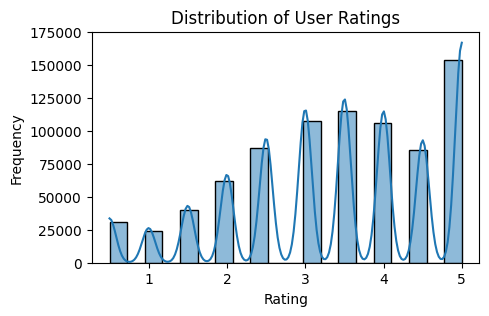

In [37]:
# user_rating 시각화
plt.figure(figsize=(5, 3))
sns.histplot(data=user_rating, x='rating', bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

- 사용자별 장소 평가 수의 무작위성: 각 사용자가 리뷰하는 장소의 수가 무작위로 결정되어 사용자 각각의 활동성을 다르게 나타냅니다. 이를 통해 데이터에 현실성을 더합니다.
- 평균과 표준 편차의 사용자별 설정: 각 사용자의 성향(관대함, 엄격함)을 다르게 설정하여 개인의 평가 스타일을 반영합니다.
- 데이터 프레임의 생성 방식 변경: 각 사용자마다 무작위로 선택된 장소를 평가하게 하여 모든 사용자가 모든 장소를 평가하지 않도록 설정합니다. 이는 실제 세계에서 모든 사용자가 모든 장소를 평가하지 않는 현실을 반영합니다.
- 장소의 인기도 반영: 각 장소에 대해 평균 평점 조정치를 설정하여, 인기 있는 장소가 높은 평균 평점을 받는 경향을 반영합니다. 이는 장소별로 일정한 정규 분포를 이용해 장소의 인기를 무작위로 결정합니다.
- 사용자와 장소 특성에 따른 평점 계산: 평점은 사용자의 평균 평점과 장소의 인기도 조정치를 더한 값에 기반해 정규 분포에서 샘플링합니다. 이렇게 함으로써 각 리뷰가 사용자의 개별적 성향과 장소의 특성을 모두 반영할 수 있도록 설계됩니다.
- 평점의 범위와 반올림 처리: 생성된 평점을 0.5에서 5 사이로 제한하고, 가장 가까운 0.5 단위로 반올림하여 현실적인 평점 체계를 유지합니다.

Text(0.5, 0, 'Rating')

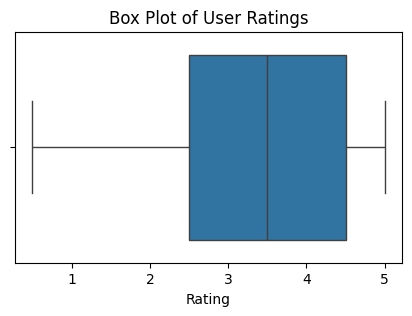

In [38]:
# 이상치 시각화
plt.figure(figsize=(5, 3))
sns.boxplot(data=user_rating, x='rating')
plt.title('Box Plot of User Ratings')
plt.xlabel('Rating')

In [39]:
# user_id 별 평균 평점
user_rating.groupby('user_id')['rating'].mean()

# 평점이 높은 순대로 정렬
user_rating.sort_values(by='rating', ascending=False)

,user_id,place_id,rating
7,0,1111,5.0
346581,430,833,5.0
346615,430,767,5.0
346534,430,1045,5.0
346620,430,403,5.0
...,...,...,...
75,0,1345,0.5
346484,430,658,0.5
405022,503,424,0.5
304992,377,940,0.5


In [41]:
# 잣대가 관대한 편인 user 찾기 (평점을 높게 주는 경향이 있는 유저)
user_rating.groupby('user_id')['rating'].mean().sort_values(ascending=False)

user_id
409    4.370744
240    4.362326
775    4.360752
470    4.344577
318    4.343805
         ...   
4      2.423232
760    2.395833
946    2.250000
592    2.208333
508    1.000000
Name: rating, Length: 1000, dtype: float64

In [42]:
# 가장 많은 장소를 리뷰한 유저와 장소수
user_rating.groupby('user_id')['place_id'].count().sort_values(ascending=False)

user_id
537    1661
98     1661
930    1656
630    1655
806    1655
       ... 
983       7
728       6
946       4
853       1
508       1
Name: place_id, Length: 1000, dtype: int64

In [ ]:
# json 파일로 변환
user_rating.to_json(f'update_user_rating_{num_users}.json', orient='records')
df.to_json(f'df_1663.json', orient='records')


In [ ]:
user_rating.info()